<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Neural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])
#df = df.drop(['inst.name', 'type', 'CPLEXStatus'], axis = 1)
#standard_deviations = 3
#df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
#   .all(axis=1)]

#print(df.shape[0])

#names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2',
   #      '(m/n)^3', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#for i in range(df.shape[0]):
 # if(df.iloc[i]['n/m'] == 2 and df.iloc[i]['y']==99999):
  #  for j in range(len(names)):
   #   print(names[j]+"->"+str(df.iloc[i][names[j]]))
    #print("------------------------------------------------------------------")


shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
print(X.head())
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])




8750
   subtype  class  indeks    n   m    n/m   (n/m)^2      (n/m)^3       m/n  \
0        1      5       9   40  20   2.00    4.0000     8.000000  0.500000   
1        5      7       3   54  18   3.00    9.0000    27.000000  0.333333   
2        4      1       1  132  48   2.75    7.5625    20.796875  0.363636   
3       13      4       7  120  12  10.00  100.0000  1000.000000  0.100000   
4        5      5       8  180  60   3.00    9.0000    27.000000  0.333333   

    (m/n)^2   (m/n)^3   av.length    std.dev  median  range  min  max    k  
0  0.250000  0.125000  106.199997  52.751087   112.5    201   11  212   35  
1  0.111111  0.037037  216.537033  53.860657   223.0    223  106  329   49  
2  0.132231  0.048084   51.272728  29.395979    49.0     99    1  100   74  
3  0.010000  0.001000   99.541664  21.778059   102.0    116   30  146   66  
4  0.111111  0.037037  105.366669  41.889446   104.5    211    3  214  107  


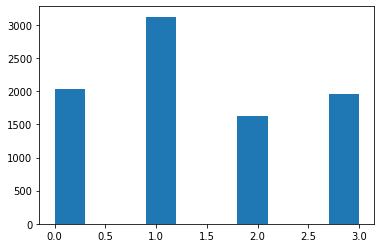

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified = X
#X_modified = X.drop(['n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'max', 'av.length'], axis = 1)
#print(X_modified.shape[1])

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [4]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X = pd.DataFrame(X, columns=names)
#print(X.head())

from sklearn.decomposition import PCA

#,'PC2','PC3','PC4','PC5','PC6','PC7','PC8
#pca = PCA(n_components=9)
#pca.fit(X)
#X = pca.transform(X)
#X = pd.DataFrame(X,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
names = [ 'n', 'n/m', 'av.length', 'std.dev', 'median', 'range',  'max', 'k']
X_modified = X.drop(['min','indeks', 'class', 'm', 'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)


#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(8, input_dim = X_modified.shape[1], activation='relu'))
#classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(8, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(8, activation='relu'))

classifier.add(Dense(4, activation='relu'))

classifier.add(Dense(4, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 480
Trainable params: 480
Non-trainable pa

In [6]:
#classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1)
#scores = classifier.evaluate(X_test, y_test)
#for i, m in enumerate(classifier.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))
#print(X_test_copy.iloc[0]['subtype'])

Epoch 1/600
114/114 [==============================] - 3s 13ms/step - loss: 1.2188 - accuracy: 0.5161 - val_loss: 1.0930 - val_accuracy: 0.5491
Epoch 2/600
114/114 [==============================] - 1s 6ms/step - loss: 0.9614 - accuracy: 0.6224 - val_loss: 0.9148 - val_accuracy: 0.6284
Epoch 3/600
114/114 [==============================] - 0s 4ms/step - loss: 0.8511 - accuracy: 0.6413 - val_loss: 0.8419 - val_accuracy: 0.6230
Epoch 4/600
114/114 [==============================] - 1s 5ms/step - loss: 0.7924 - accuracy: 0.6624 - val_loss: 0.7898 - val_accuracy: 0.6922
Epoch 5/600
114/114 [==============================] - 1s 5ms/step - loss: 0.7152 - accuracy: 0.7096 - val_loss: 0.6508 - val_accuracy: 0.7594
Epoch 6/600
114/114 [==============================] - 1s 5ms/step - loss: 0.6187 - accuracy: 0.7452 - val_loss: 0.6065 - val_accuracy: 0.7594
Epoch 7/600
114/114 [==============================] - 1s 5ms/step - loss: 0.5771 - accuracy: 0.7494 - val_loss: 0.5567 - val_accuracy: 0.772

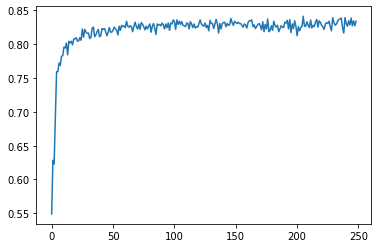

In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 64, 
                    epochs = 600, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])
plt.plot(history.history['val_accuracy'])



In [8]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_test)
#print(pred)
pred_ = np.argmax(pred, axis = 1)
#print(pred_)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])


#for i,j in zip(pred_, true_y):
#    print("Predicted: {}, True: {}".format(i, j))

cnt = 0
cnt_correct = 0

for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  if(pred_[i] == 0 and true_y[i] == 3):
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")
  
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

n->180.0
n/m->2.0
av.length->706.877808
std.dev->175.294418
median->749.5
range->848.0
max->1104.0
k->154.0
------------------------------------------------------------------
n->40.0
n/m->2.0
av.length->87.949997
std.dev->48.46566
median->80.0
range->216.0
max->239.0
k->37.0
------------------------------------------------------------------
n->120.0
n/m->2.0
av.length->467.700012
std.dev->115.940849
median->463.5
range->733.0
max->897.0
k->101.0
------------------------------------------------------------------
n->160.0
n/m->2.0
av.length->102.606247
std.dev->46.929787
median->100.5
range->261.0
max->271.0
k->100.0
------------------------------------------------------------------
accuracy: 83.40%


accuracy: 83.40%


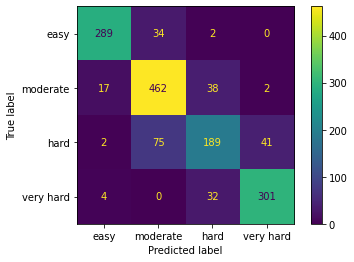

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

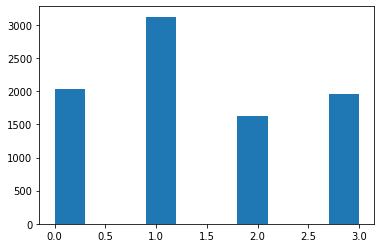

In [10]:
y_new = np.array(y_new)
plt.hist(y_new)
#plt.title('0->[0,2000) : 1->[2000,99999]')
plt.show()

ROC AUC score: 0.8822033488189781


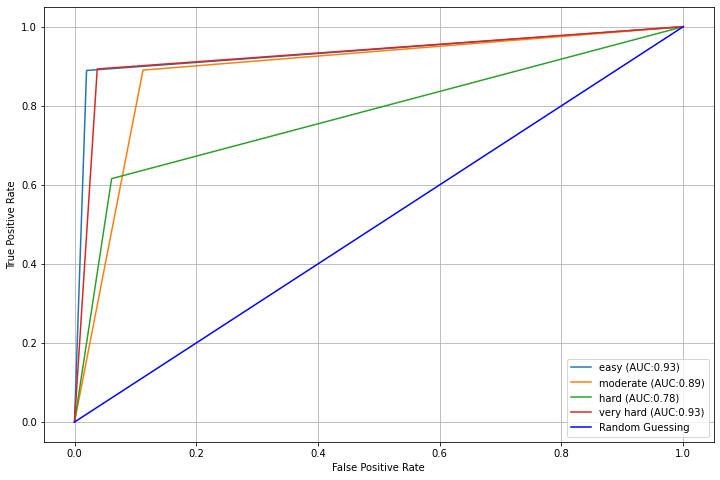

In [11]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()